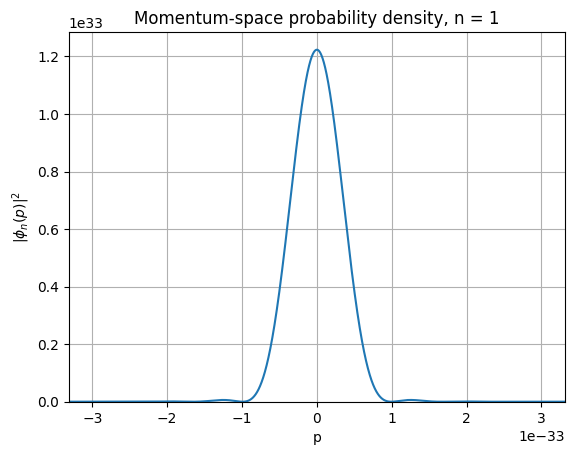

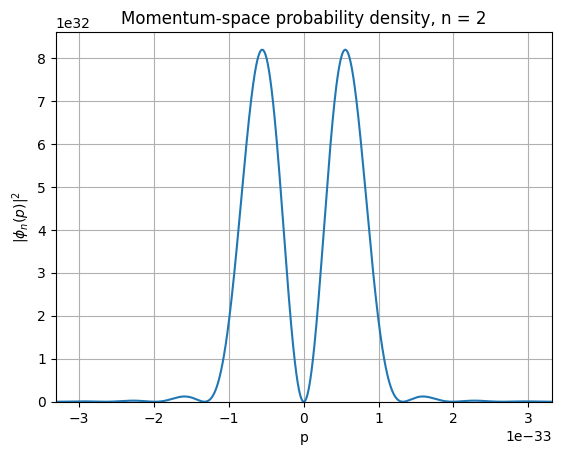

/var/folders/4t/mlb4n8z53ld3wzzjzjv4hf6h0000gn/T/ipykernel_24846/2496642783.py:9: RuntimeWarning: invalid value encountered in divide
  rho = (2*L/(np.pi*hbar)) * teller / nevner


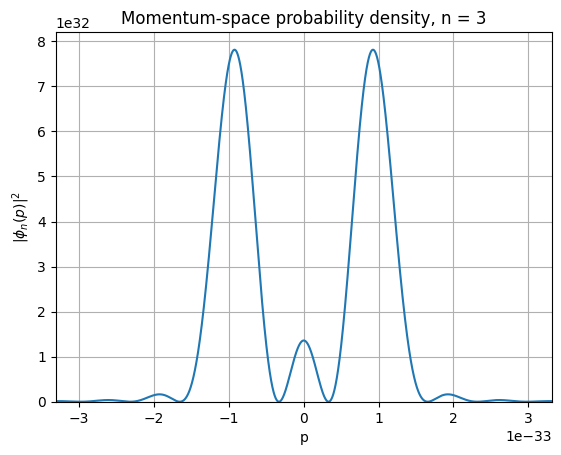

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def rho_n_p(p, n, L, hbar):
    P = p * L / hbar                     
    teller = (n*np.pi)**2 * (1 - (-1)**n * np.cos(P))
    nevner = (n**2 * np.pi**2 - P**2)**2     
    rho = (2*L/(np.pi*hbar)) * teller / nevner

    # removable singularities at P = ± nπ
    limit = L / (4*np.pi*hbar)
    mask = np.isclose(np.abs(P), n*np.pi, atol=1e-12) | (nevner == 0)
    rho[mask] = limit
    return rho

L = 1.0
hbar = 1.054571817e-34
pmax = 10*np.pi*hbar/L
p = np.linspace(-pmax, pmax, 20001)

for n in [1, 2, 3]:
    y = rho_n_p(p, n, L=L, hbar=hbar)
    plt.figure()
    plt.plot(p, y)
    plt.xlabel("p")
    plt.ylabel(r"$|\phi_n(p)|^2$")
    plt.title(f"Momentum-space probability density, n = {n}")
    plt.xlim(-pmax, pmax)
    plt.ylim(0, None)
    plt.grid(True)
    plt.show()
